In [2]:
# Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import cm

In [6]:
# print("Current working directory:", os.getcwd())

In [8]:
goldenRatio = (5**.5 - 1) / 2.

In [30]:
'''
    A simple function to extrapolate data from HDF5 file
'''

def data_extrapolation(file_name, label):     
    tmp_file = h5py.File(file_name, "r")
    if label in tmp_file.keys():
        tmp_Sz = np.array(tmp_file[label]).transpose()
    else:
        error("Error: key doesn't exist!")
    return tmp_Sz

In [32]:
'''
    Truncate colors from continuous color palette
'''

def obtain_colors(number_of_lines, palette):
    color_interval = np.linspace(0, 1, number_of_lines)
    colors = [palette(x) for x in color_interval]
    return colors

In [380]:
Nsites = 200   # Number of physical sites in the 1D chain.
Nsamples = 23  # Number of samples.

In [318]:
SvN = np.zeros([Nsamples, Nsites - 1])
# colors = obtain_colors(Nsamples + 5, cm.gist_heat_r)

In [320]:
for index in range(1, Nsamples + 1):
    tmp_file = "data/heisenberg_binomial_disorder_v" + str(index) + ".h5"
    SvN[index - 1, :] = data_extrapolation(tmp_file, "SvN")
SvN

array([[0.69314718, 0.33199361, 0.69723054, ..., 0.75895212, 0.69249325,
        0.69314718],
       [0.69314718, 0.32982059, 0.69565262, ..., 0.7070256 , 0.34182737,
        0.69314707],
       [0.69314718, 1.18468523, 0.73340795, ..., 0.70499071, 0.13342432,
        0.6918968 ],
       ...,
       [0.57645544, 0.69816849, 0.74646474, ..., 0.7779997 , 0.55032157,
        0.69314718],
       [0.69280953, 0.04626865, 0.68521958, ..., 0.69788792, 0.11560942,
        0.69312752],
       [0.693147  , 1.20065921, 0.71594508, ..., 0.78568408, 0.56612751,
        0.69313675]])

In [322]:
SvN_mean = np.mean(SvN, axis = 0)
SvN_mean.shape

(199,)

In [324]:
SvN_std = np.std(SvN, axis = 0)
SvN_std = np.sqrt(SvN_std) / np.sqrt(Nsamples)
SvN_std.shape

(199,)

In [326]:
SvN0 = data_extrapolation("data/heisenberg_uniform_disorder_v0.h5", "SvN")

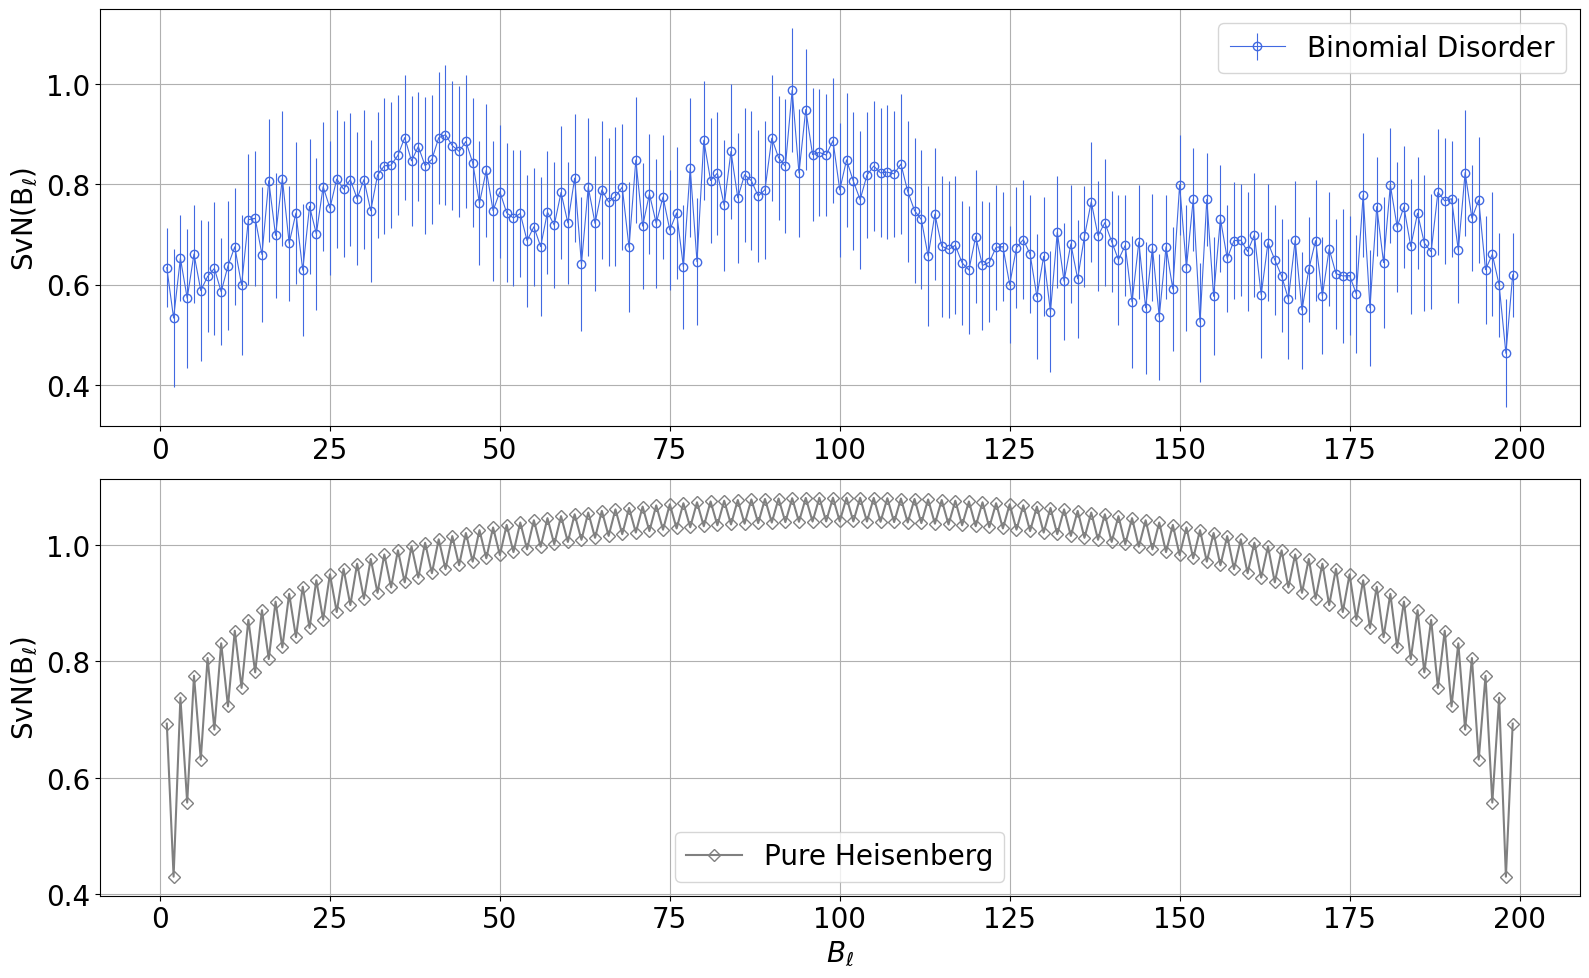

In [328]:
'''
    Analyze the sample average and standard error of disorder realization
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])
# for index in range(Nsamples):
#     if index % 25 == 0:
#         ax.plot(np.arange(1, Nsites), SvN[index, :], color = colors[index + 10], linewidth = 0.8, \
#                 marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Iteration #" + str(index + 1))
ax.errorbar(np.arange(1, Nsites), SvN_mean, yerr = SvN_std, color = "royalblue", linewidth = 0.8, \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Binomial Disorder")

ax.set_ylabel(r"$\rm SvN(B_{\ell})$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, Nsites), SvN0, color = "gray", \
        marker = "D", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Pure Heisenberg")

ax.set_xlabel(r"$B_{\ell}$", fontsize = 20)
ax.set_ylabel(r"$\rm SvN(B_{\ell})$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

plt.savefig("figures/Binomial_disorder_N200_SvN.pdf")

In [329]:
Sz0 = data_extrapolation("data/heisenberg_uniform_disorder_v0.h5", "Sz T=0")

In [332]:
Sz = np.zeros([Nsamples, Nsites])
for index in range(1, Nsamples + 1):
    tmp_file = "data/heisenberg_binomial_disorder_v" + str(index) + ".h5"
    Sz[index - 1, :] = data_extrapolation(tmp_file, "Sz T=0")
Sz

array([[ 3.36538384e-09, -1.27255328e-09,  3.03151392e-09, ...,
        -1.56644495e-08,  6.30249770e-09, -1.38528366e-08],
       [ 3.32874662e-08, -2.47546335e-08,  4.56105912e-08, ...,
        -3.16248746e-04,  1.71006643e-04, -2.39585164e-04],
       [ 1.40936008e-08, -2.83206746e-09,  3.66786877e-09, ...,
        -3.83969239e-02,  2.12271607e-02, -2.49985741e-02],
       ...,
       [ 2.36724247e-01, -1.08963062e-01,  9.24008234e-02, ...,
        -2.45879795e-05,  1.29177030e-05, -2.14736187e-05],
       [ 1.29925600e-02, -1.18576899e-02,  6.68540438e-02, ...,
        -1.49353728e-02,  2.64949305e-03, -3.13529285e-03],
       [ 2.97718651e-04, -8.74937391e-05,  9.54987371e-05, ...,
        -2.59266027e-03,  1.35998077e-03, -2.28369554e-03]])

In [334]:
Sz_mean = np.mean(Sz, axis = 0)
Sz_mean.shape

(200,)

In [336]:
Sz_std = np.sqrt(np.std(Sz, axis = 0)) / np.sqrt(Nsamples)
Sz_std.shape

(200,)

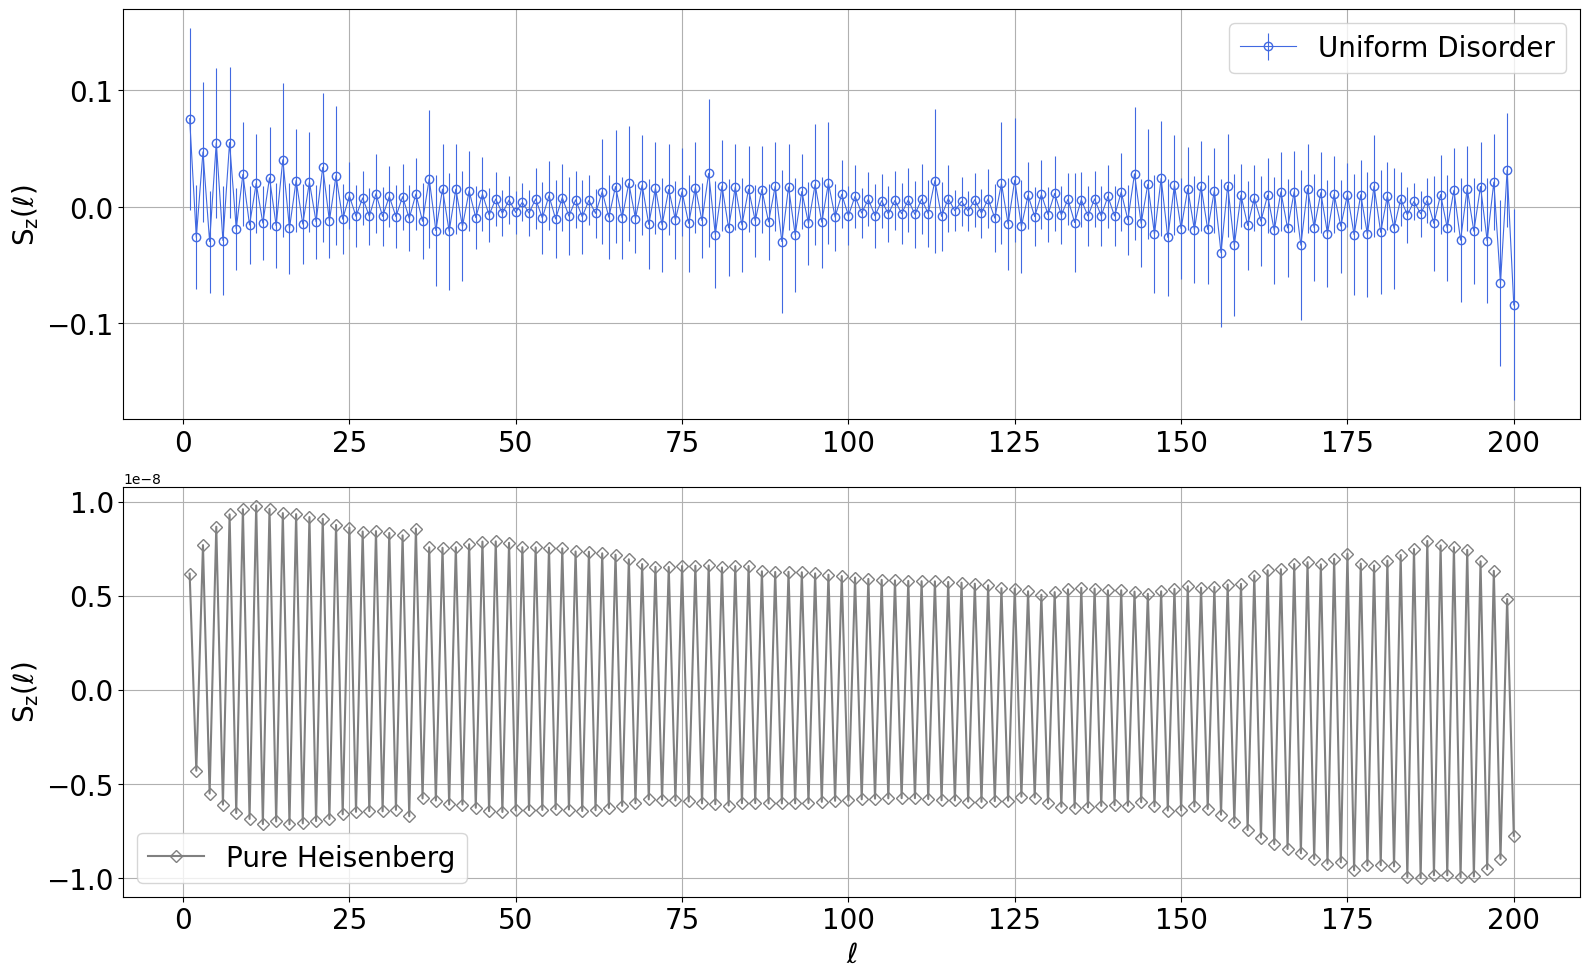

In [338]:
'''
    Analyze the sample average and standard error of disorder realization
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])
ax.errorbar(np.arange(1, Nsites + 1), Sz_mean, yerr = Sz_std, color = "royalblue", linewidth = 0.8, \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Uniform Disorder")

ax.set_ylabel(r"$\rm S_{z}(\ell)$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, Nsites + 1), Sz0, color = "gray", \
        marker = "D", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Pure Heisenberg")

ax.set_xlabel(r"$\ell$", fontsize = 20)
ax.set_ylabel(r"$\rm S_{z}(\ell)$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

plt.savefig("figures/Binomial_disorder_N200_Sz.pdf")

In [356]:
Czz0 = data_extrapolation("data/heisenberg_uniform_disorder_v0.h5", "Czz T=0")[100, :]
Czz0.shape

(200,)

In [382]:
Czz = np.zeros([Nsamples, Nsites])
for index in range(1, Nsamples + 1):
    tmp_file = "data/heisenberg_binomial_disorder_v" + str(index) + ".h5"
    Czz[index - 1, :] = data_extrapolation(tmp_file, "Czz T=0")[100, :]
Czz.shape

(23, 200)

In [384]:
Czz_mean = np.mean(Czz, axis = 0)
Czz_mean.shape

(200,)

In [386]:
Czz_std = np.sqrt(np.std(Czz, axis = 0)) / np.sqrt(Nsamples)
Czz_std.shape

(200,)

In [388]:
phase_factor = np.array([1, -1] * 100)
# phase_factor

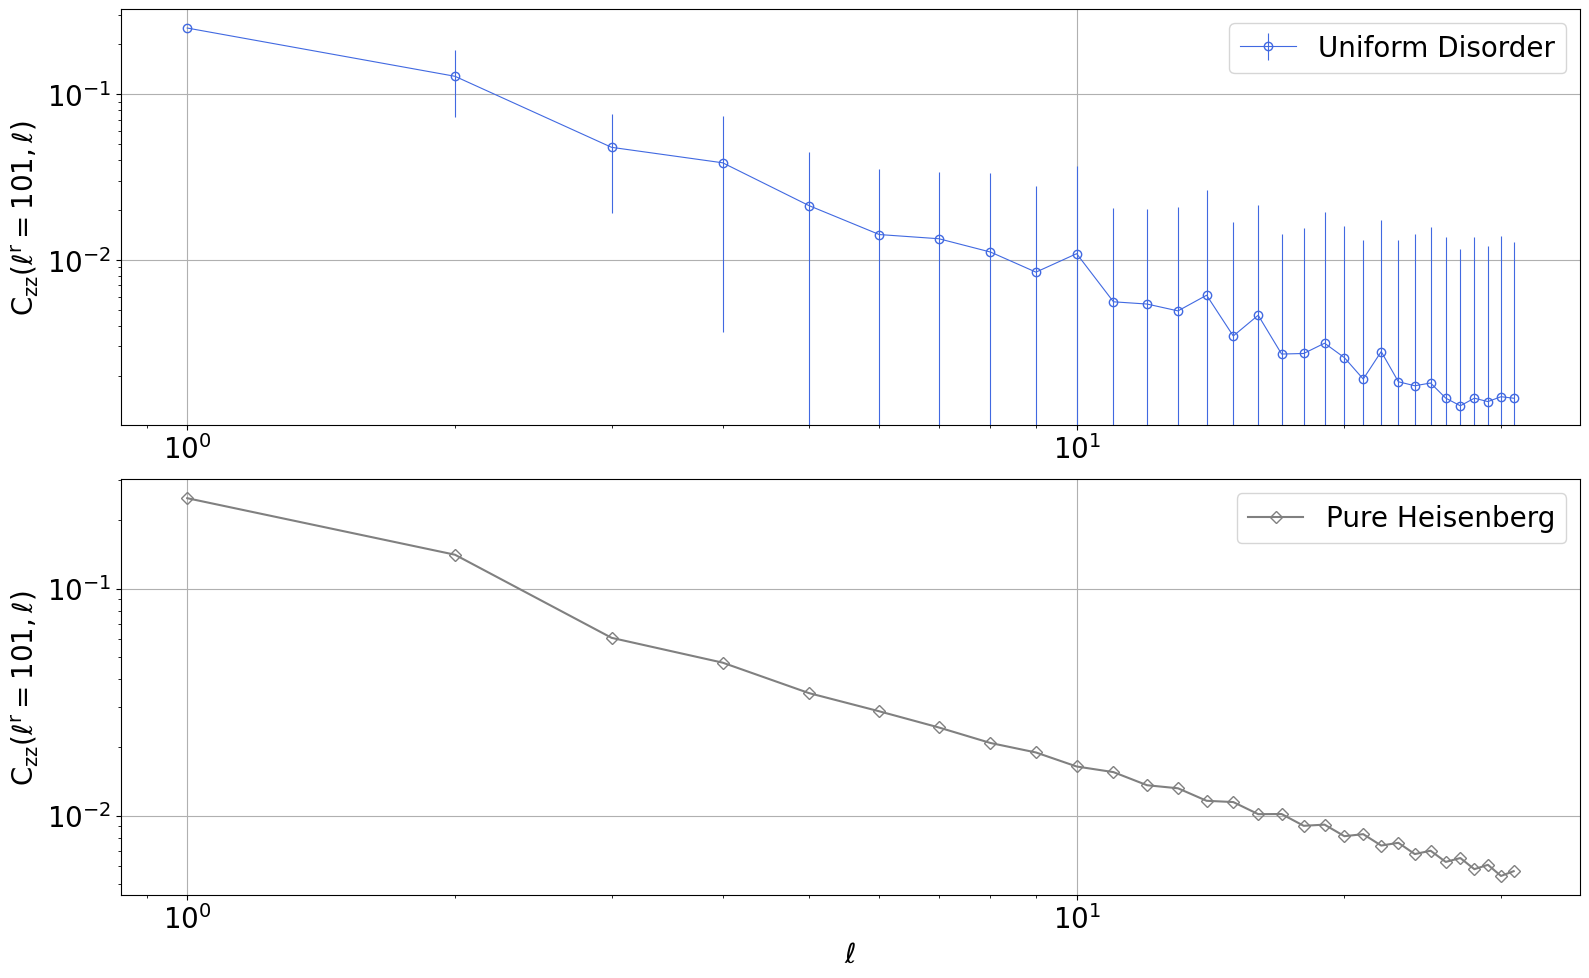

In [390]:
'''
    Analyze the sample average and standard error of disorder realization
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])
ax.errorbar(101 - np.arange(70, 101), Czz_mean[70 : 101] * phase_factor[70 : 101], yerr = Czz_std[70 : 101], color = "royalblue", linewidth = 0.8, \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Uniform Disorder")

# ax.set_xlim(70, 101)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$\rm C_{zz}(\ell^{r} = 101, \ell)$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(101 - np.arange(70, 101), Czz0[70 : 101] * phase_factor[70 : 101], color = "gray", \
        marker = "D", markersize = 6, markeredgewidth = 1, markerfacecolor = "none", label = r"Pure Heisenberg")

# ax.set_xlim(70, 101)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$\ell$", fontsize = 20)
ax.set_ylabel(r"$\rm C_{zz}(\ell^{r} = 101, \ell)$", fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# plt.savefig("figures/Binomial_disorder_N200_Czz.pdf")